> # **단순 선형 회귀**

## < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

##### 1. 데이터 수집 및 탐색 
##### 2. 모델 클래스 선택
##### 3. 모델 객체 생성 
##### 4. 모델에 사용할 특성 데이터셋 및 타겟 데이터셋 준비 
##### 5. 객체에 대해 학습 수행 : fit()
##### 6. 실행 객체 또는 추정된 모델에 대해 예측 수행 : predict()
##### 7. 분석 결과 평가 : MSE, RMSE, R2(결정계수)

### 필요한 모듈 import

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [30]:
beer = pd.read_csv("/Users/hayeon/Downloads/데청캠/회귀분석/data/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

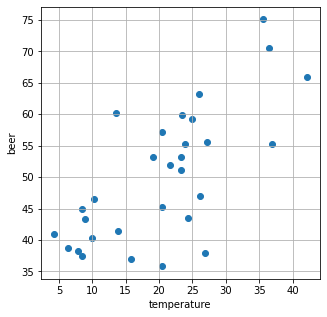

In [31]:
plt.figure(figsize=(5,5)) 
plt.scatter(beer['temperature'], beer['beer']) 
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

* 독립변수 temperature

In [32]:
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

* 종속변수 beer

In [33]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [34]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np 

#독립변수, 종속변수 데이터셋 준비
x = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(\
                                                   x, y, test_size=0.2, \
                                                   random_state=1)

### 모델 구축

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [36]:
# 학습 수행
reg = lr.fit(X_train, y_train)

##### -> 학습을 통해 회귀계수, 절편을 갖게 됨.
* coefficient : 계수 
* intercept : 절편

In [37]:
reg.coef_, reg.intercept_ 

(array([0.69705648]), 36.06666541566105)

In [38]:
#회귀식
print("y = {:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))
# 계수는 어레이 형식이기 때문에  coef_[0]으로 표시

y = 0.697056X + 36.067


In [39]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2)) 

# np.round는 그냥 round와는 다르게 모든 수에 똑같이 다 적용

[60.81 50.36 54.33 50.36 41.92 43.18]


In [40]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [41]:
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

### 모델 성능 평가

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

#MSE
mse = mean_squared_error(y_test, y_pred) # 예측한 정답과의 차이 = 에러

#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))

MSE: 91.347
RMSE: 9.558


In [43]:
#결정계수 R2 ** 가장 중요 (예측분산/실제분산)
r2 = r2_score(y_test, y_pred) # 필요한게 예측, 실제니까 실제정답, 예측정답 입력
print("R2: ", np.round(r2,3)) 
# 0.485정도 겹쳐있음

R2:  0.485


In [44]:
print(reg.score(X_test, y_test))

0.48456481297951504


y는 맥주판매량 
RMSE가 9.558이었으니까 맥주 소비량이 그정도. 

### 시각화

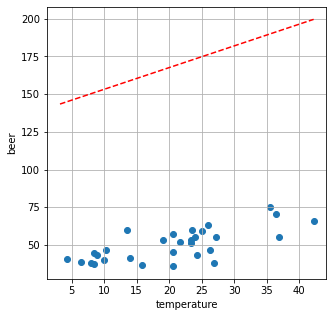

In [68]:
#y = 0.697056X + 36.06 시각화
# 회귀식을 보여주는 코드
plt.figure(figsize=(5,5))
xx = np.arange(beer['temperature'].min() -1,  # 독립변수의 최소값보다 한칸 이전
               beer['temperature'].max() +1) # 1만큼만 오른쪽으로 가줘 

# 실제 데이터의 최소 최대보다 한칸씩 넓혀서 회귀식 그리려 한다.
yy = reg.predict(xx.reshape(len(xx),1))# 2차원 어레이로 바꾸는 과정

plt.plot(xx, yy, linestyle='--', color='red')

# 수집한 데이터셋 시각화 (원래데이터를 보여주는 코드)
plt.scatter(beer['temperature'], beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

> # **Case1. 나이, 키의 관계 회귀 분석**

In [19]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.linear_model import LinearRegression

#### 데이터 생성/수집

In [46]:
data_df = pd.read_csv("/Users/hayeon/Downloads/데청캠/회귀분석/data/age_height.csv" )
data_df

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [21]:
# 데이터 분포 시각화

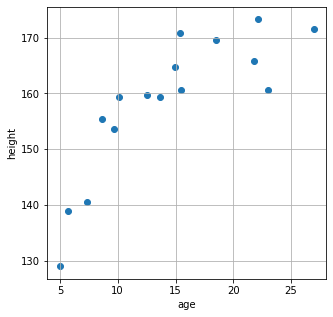

In [47]:
plt.figure(figsize=(5,5)) # figur : 5,5 사이즈의 캔버스 준비 
plt.scatter(data_df['age(X)'], data_df['height(T)']) # 스캐터 뒤에 x, y좌표 쓰기 x, y 1:1 매핑해서 좌표평면에 그리기 
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [48]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X = np.array(data_df['age(X)']).reshape(-1,1)
y = data_df['height(T)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state =1)

In [49]:
# 모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[1.43863478]
138.78419382830361


In [50]:
# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred, 2))

[156.85 177.56 158.41 145.98]


In [51]:
# 모델 성능 평가
from sklearn.metrics import mean_squared_error, r2_score


#MSE
mse = mean_squared_error(y_test, y_pred) # 빼놓은 6개 데이터의 정답, 아까 예측한 정답과의 차이 = 에러

#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))


#결정계수 R2
r2 = r2_score(y_test, y_pred) # 필요한게 예측, 실제니까 실제정답, 예측정답 넣어준다.
print("R2: ", np.round(r2,3))


#회귀식
print(reg.coef_, reg.intercept_)
print("y = {:2f}X + {:.3f}".format(reg.coef_[0], reg.intercept_))

MSE: 83.495
RMSE: 9.138
R2:  0.663
[1.43863478] 138.78419382830361
y = 1.438635X + 138.784


In [64]:
xx=xx.reshape(-1,1)

In [70]:
yy=yy.reshape(-1,1)

In [74]:
yy

array([[143.38782513],
       [144.82645991],
       [146.26509469],
       [147.70372947],
       [149.14236425],
       [150.58099903],
       [152.01963381],
       [153.45826859],
       [154.89690337],
       [156.33553815],
       [157.77417294],
       [159.21280772],
       [160.6514425 ],
       [162.09007728],
       [163.52871206],
       [164.96734684],
       [166.40598162],
       [167.8446164 ],
       [169.28325118],
       [170.72188596],
       [172.16052074],
       [173.59915553],
       [175.03779031],
       [176.47642509],
       [177.91505987],
       [179.35369465],
       [180.79232943],
       [182.23096421],
       [183.66959899],
       [185.10823377],
       [186.54686855],
       [187.98550333],
       [189.42413811],
       [190.8627729 ],
       [192.30140768],
       [193.74004246],
       [195.17867724],
       [196.61731202],
       [198.0559468 ],
       [199.49458158]])

In [72]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화


# 우리가 구한 회귀식을 보여주는 코드
plt.figure(figsize=(5,5))
xx = np.linspace(data_df['age(X)'].min() -1, 
               data_df['age(X)'].max() +1)
# 실제 데이터의 최소 최대보다 한칸씩 넓혀서 회귀식 그리려 한다.
yy = reg.predict(xx)

plt.plot(xx, yy, linestyle='--', color='red')
# 수집한 데이터셋 시각화 (원래데이터를 보여주는 코드)
plt.scatter(data_df['age(X)'], data_df['height(T)'])

plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[ 4.00285937  4.49163644  4.98041351  5.46919059  5.95796766  6.44674473
  6.9355218   7.42429888  7.91307595  8.40185302  8.89063009  9.37940716
  9.86818424 10.35696131 10.84573838 11.33451545 11.82329253 12.3120696
 12.80084667 13.28962374 13.77840082 14.26717789 14.75595496 15.24473203
 15.7335091  16.22228618 16.71106325 17.19984032 17.68861739 18.17739447
 18.66617154 19.15494861 19.64372568 20.13250275 20.62127983 21.1100569
 21.59883397 22.08761104 22.57638812 23.06516519 23.55394226 24.04271933
 24.5314964  25.02027348 25.50905055 25.99782762 26.48660469 26.97538177
 27.46415884 27.95293591].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 360x360 with 0 Axes>

# < 스탯츠모델에서 단순선형회귀 수행>

In [ ]:
#스탯츠모델 import
import statsmodels.api as sm 

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('/Users/hayeon/Downloads/데청캠/회귀분석/data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']


X_train, X_test, y_train, y_test = train_test_split(\
                                                   X, y, test_size=0.2,
                                                   random_state=1)

# 모델 객체를 생성할 때 스텟츠에서는 상수항이 더해진 입력변수를 요구하기 때문에 
# X- train, x_test에 상수항을 더해주는 과정이 필요하다. add_constant 
# 새로운 X_train, X_test 
X_train = sm.add_constant(X_train) # 상수항을 미리 더해줘야한다. (스탯츠에서는)X-train에 넣어줘야함
X_test = sm.add_constant(X_test)

##### =================================

In [ ]:
X_test

In [ ]:
X_test = sm.add_constant(X_test)
X_test # 각각에 상수항 1을 더해준 것 add_constant (절편을 계산하기 위해. 이런 절차를 요구한다.)

##### ==========================

In [ ]:
# 스탯츠모델 (최소제곱법)
lr = sm.OLS(y_train, X_train) # 순서 아까와 다르게 바뀌었으니 주의
reg = lr.fit()

In [ ]:
# 성능 평가
y_pred = reg.predict(X_test)

print(reg.summary()) # summary는 사이킷에는 없고 스탯츠에만 있다.
# OLS 모델이고 Least - 최소제곱법을 사용해! 
# DEp.- 종속은 맥주야! 
# F 검정의 통계량이 의미하는 것 : 0.05 보다 작으면 모형의 유의성이 인정된다. = 의미있는 모델이다. 
# const : coef- 절편 / x1의 coef : 기울기 ?? 
# p 값이 0.05보다 크면 유의미하지 않다는 의미. 0.00이라는 건 아주 작은순데 소수점 세자리까지 잘라서 저렇게 보임 
# => 의미있는 회귀 


# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston() # 생성자 만들어줘야함

### 데이터 탐색

In [ ]:
print(boston.DESCR)
# 샘플 506개 506개의 구역으로 나눴다.
# 독립변수 13개 - 숫자, 범주형 자료 있다. 
# 네번째 속성의 medium value가 종속변수다.
# MEDV가 타겟 (종속)

In [ ]:
dir(boston) # 

In [ ]:
boston.feature_names # 독립변수 MEDV를 제외한 13개

In [ ]:
boston.target[:5] # 24 = 2만 4천 (천달러단위라고 descr에 나와있음)

In [ ]:
boston.data[:5]

### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [ ]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

In [ ]:
# 단순선형회귀할건데 독립변수가 너무 많아! 
# 독립 1 종속 1만 가져다가 머신러닝 알고리즘의 데이터로 사용할 것이다. 

In [ ]:
df.head() # 다 독립변수다. 단순선형회귀를 하기 위해 독립변수 1개만 가져갈것 RM = room

In [ ]:
x = df['RM'] # X는 시리즈가 된다. 머신러닝 fit에 넣기 위해서는 2차원으로 만들어야 함 -> 2차원 df로 만들어버리자
x = pd.DataFrame(df['RM'])
# RM 한 열만 가져오니까 시리즈였는데 데이터프레임으로 만드니까 2차원으로 바뀌었다. 

y = boston.target

In [ ]:
x

In [ ]:
y[:5]

#### x는 2차원, y는 1차원으로 정리

### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,\
                                                   random_state =1)



### 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred) # reg.score()해도 똑같다.
print("MSE:", np.round(mse,3))
print("RMSE: ", np.round(rmse,3))
print("R2:", np.round(r2,3))

In [ ]:
reg.coef_, reg.intercept_

### 시각화

In [ ]:
# 방의 개수와 주택중간가격 관계를 시각화 

# y = 8.46x - 30.57
plt.figure(figsize = (5,5))
plt.scatter(x, y, c ='r', s=5) #s = 점의 사이즈 (스캐터 점)
xx = np.linspace(x.min(), x.max())
yy = reg.predict(xx.reshape(len(xx), 1))
plt.plot(xx, yy, linestyle='-', color='g')
plt.grid()
plt.show()
